(5744, 7755)
  (0, 4940)	1
  (0, 6682)	1
  (0, 1338)	1
  (0, 5337)	1
  (0, 7667)	1
  (0, 1578)	1
  (0, 5700)	1
  (0, 2167)	1
  (0, 2159)	1
  (0, 3562)	1
  (0, 2671)	3
  (0, 5748)	1
  (0, 6591)	1
  (0, 729)	2
  (0, 4737)	2
  (0, 3561)	2
  (0, 121)	3
  (0, 390)	1
  (0, 6080)	1
  (0, 6661)	1
  (0, 7425)	1
tf-idf result
(5744, 7755)
  (0, 7667)	0.06850812955585264
  (0, 7425)	0.19083611454640934
  (0, 6682)	0.035731935054092
  (0, 6661)	0.22007188093800897
  (0, 6591)	0.22007188093800897
  (0, 6080)	0.19568797220134507
  (0, 5748)	0.13905244607334483
  (0, 5700)	0.21413368708626973
  (0, 5337)	0.0678673890137376
  (0, 4940)	0.039279818421729985
  (0, 4737)	0.27326309366457835
  (0, 3562)	0.23851759582293372
  (0, 3561)	0.47703519164586744
  (0, 2671)	0.1932369973563752
  (0, 2167)	0.23851759582293372
  (0, 2159)	0.1713040634646811
  (0, 1578)	0.1931516214065813
  (0, 1338)	0.06837429084260754
  (0, 729)	0.25867986421060846
  (0, 390)	0.13522320015552172
  (0, 121)	0.3758075461656954
random

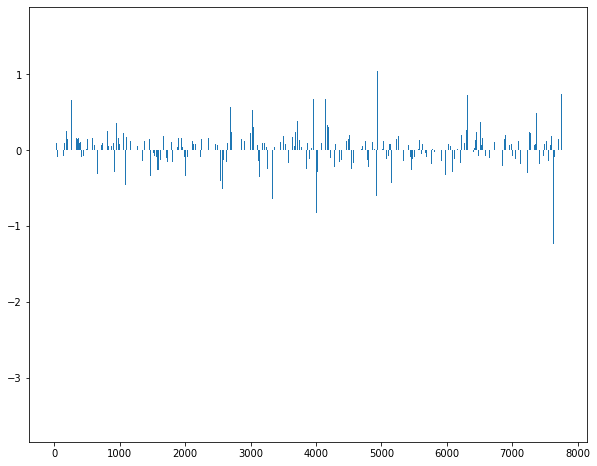

[(1.6302142907327002, 3158), (1.168223869680846, 3983), (1.1681737646247181, 4494), (1.1349517499556192, 3038), (1.081671908108986, 2283)]
[(-1.5258280459291278, 3881), (-1.5376786146362882, 1266), (-1.6094683719984122, 2671), (-2.422747945913317, 799), (-3.5820654210672256, 6208)]
{3881: '시발', 7022: '패스', 1469: '대서', 6637: '칼날', 4940: '위드', 6682: '코로나', 1338: '단계', 5337: '일상', 76..
Positive top 20


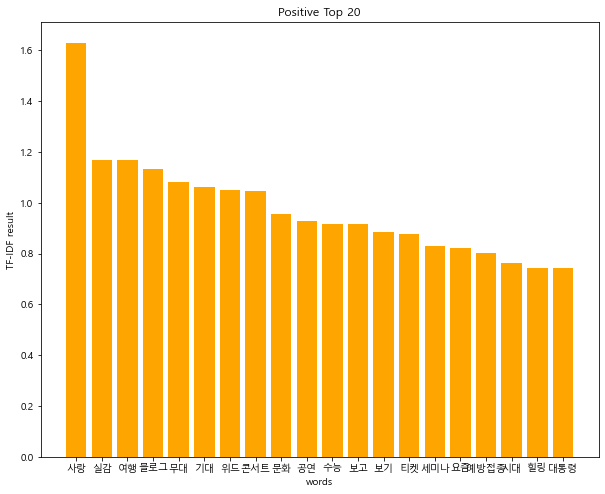

Negative top 20==========


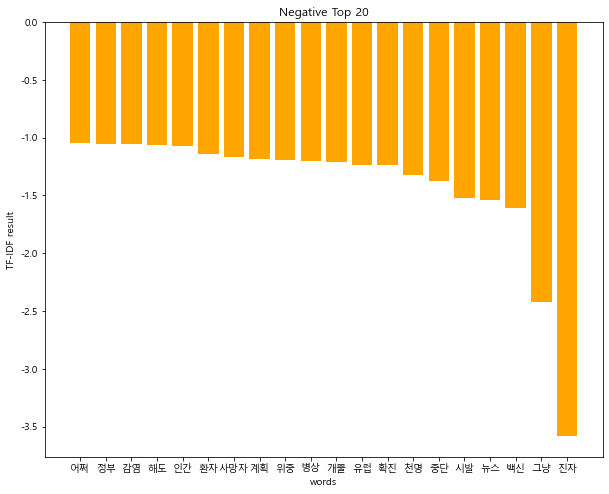

In [1]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("./words2.csv", encoding='cp949')

# corpus index 생성
index_vectorizer = CountVectorizer() # 토큰화, 벡터화를 같이 해줌
X = index_vectorizer.fit_transform(df['okt_noun']) # 토큰화 이미 해놨으니까 그냥 해놓은거 넣기만 하면 됨
# (5744, 7269) :  7269의 feature를 가진 5744개의 학습 데이터 셋 

print(X.shape)
print(X[1])
print('===================================================')

# TF-IDF
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)
print('tf-idf result')
print(X.shape)
print(X[1])

#X: tf-idf 처리 한 단어 결과, 데이터, 레이블 전부 포함, test는 30%만 사용
#test용 데이터셋 분리
print("random sampling X- train_test label")
y=df['y']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=15)
print(x_train.shape)
print(x_test.shape)

# 모델 학습
lr = LogisticRegression(random_state=15)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

#성능 평가
print("random sampling X - learning result")
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test, y_pred))
print("Recall: %.3f" % recall_score(y_test, y_pred))
print("F1: %.3f" % f1_score(y_test, y_pred))


#Confusion Matrix 출력
print("random sampling X - Confusion_matrix")
confmat= confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

#y가 0과 1을 얼마나 가지고 있는지 출력(클래스 불균형 문제 해결을 위함)
print("random sampling X - number of y on 0, 1")
print(df['y'].value_counts())



print('===================================================')
#1:1 비율로 랜덤 샘플링 수행
# y가 1,2인 샘플 중 50개를 임의로 추출해서 비율을 맞춰줌
positive_random_idx = df[df['y']==1].sample(1000,random_state=0).index.tolist()
negative_random_idx = df[df['y']==0].sample(1000,random_state=0).index.tolist()

#랜덤 데이터로 데이터셋을 나눔
# test는 30%, train 70%
print("random sampling O - train_test label")
random_idx = positive_random_idx+negative_random_idx
sample_X=X[random_idx,:]
y= df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(sample_X, y, test_size = 0.30, random_state=15)
print(x_train.shape)
print(x_test.shape)

#데이터를 다시 정제한 후 모델 학습 재진행
lr = LogisticRegression(random_state=15)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

#성능 평가
print("random sampling O - learning result")
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test, y_pred))
print("Recall: %.3f" % recall_score(y_test, y_pred))
print("F1: %.3f" % f1_score(y_test, y_pred))

#Confusion Matrix 출력
print("random sampling O - Confusion_matrix")
confmat= confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

#학습한 모델의 계수를 출력하여 피처 영향력을 확인
# 양수인 것들은 트윗에서 긍정적이라고 판단되는 단어, 음수는 트윗에서 부정적이라고 판단되는 단어라고 판단함.
plt.rcParams['figure.figsize']=[10,8]
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])
plt.show()
print(sorted(((value,index) for index, value in enumerate(lr.coef_[0])), reverse=True)[:5])
print(sorted(((value,index) for index, value in enumerate(lr.coef_[0])), reverse=True)[-5:])

#회귀 모델의 계수를 높은 순으로 정렬
# 긍정 단어와 부정 단어를 출력하기 위해 계수를 기준으로 단어를 정렬하고, 정렬된 벡터를 index_vectorizer 객체에 다시 결과 맵핑
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])),reverse=True)

#회귀 모델의 계수를 index_vec에 맵핑하여 어떤 형태소인지 출력할 수 있게 함
invert_index_vectorizer = {v: k for k, v in index_vectorizer.vocabulary_.items()}

#계수가 높은 순으로 피처에 형태소를 맵핑한 결과를 출력
print(str(invert_index_vectorizer)[:100]+'..')

#계수가 높은 feature는 립에 긍정적인 영향을 주는 형태소
print("Positive top 20")
i=0
positive_x=[]
positive_y=[]
for coef in coef_pos_index[:20]:
    positive_x.append(invert_index_vectorizer[coef[1]])
    positive_y.append(coef[0])
    i+=1
print("================================================================")
plt.clf()
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
plt.bar(positive_x,positive_y, color="orange")
plt.title('Positive Top 20')
plt.xlabel('words')
plt.ylabel('TF-IDF result')
plt.show()

#계수가 낮은 feature는 립에 부정적인 영향을 주는 형태소
print("Negative top 20==========")
i=0
negative_x=[]
negative_y=[]
for coef in coef_pos_index[-20:]:
    negative_x.append(invert_index_vectorizer[coef[1]])
    negative_y.append(coef[0])
    i+=1

plt.clf()
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
plt.bar(negative_x,negative_y, color="orange")
plt.title('Negative Top 20')
plt.xlabel('words')
plt.ylabel('TF-IDF result')
plt.show()

(5744, 7755)
  (0, 4940)	1
  (0, 6682)	1
  (0, 1338)	1
  (0, 5337)	1
  (0, 7667)	1
  (0, 1578)	1
  (0, 5700)	1
  (0, 2167)	1
  (0, 2159)	1
  (0, 3562)	1
  (0, 2671)	3
  (0, 5748)	1
  (0, 6591)	1
  (0, 729)	2
  (0, 4737)	2
  (0, 3561)	2
  (0, 121)	3
  (0, 390)	1
  (0, 6080)	1
  (0, 6661)	1
  (0, 7425)	1
tf-idf result
(5744, 7755)
  (0, 7667)	0.06850812955585264
  (0, 7425)	0.19083611454640934
  (0, 6682)	0.035731935054092
  (0, 6661)	0.22007188093800897
  (0, 6591)	0.22007188093800897
  (0, 6080)	0.19568797220134507
  (0, 5748)	0.13905244607334483
  (0, 5700)	0.21413368708626973
  (0, 5337)	0.0678673890137376
  (0, 4940)	0.039279818421729985
  (0, 4737)	0.27326309366457835
  (0, 3562)	0.23851759582293372
  (0, 3561)	0.47703519164586744
  (0, 2671)	0.1932369973563752
  (0, 2167)	0.23851759582293372
  (0, 2159)	0.1713040634646811
  (0, 1578)	0.1931516214065813
  (0, 1338)	0.06837429084260754
  (0, 729)	0.25867986421060846
  (0, 390)	0.13522320015552172
  (0, 121)	0.3758075461656954
random

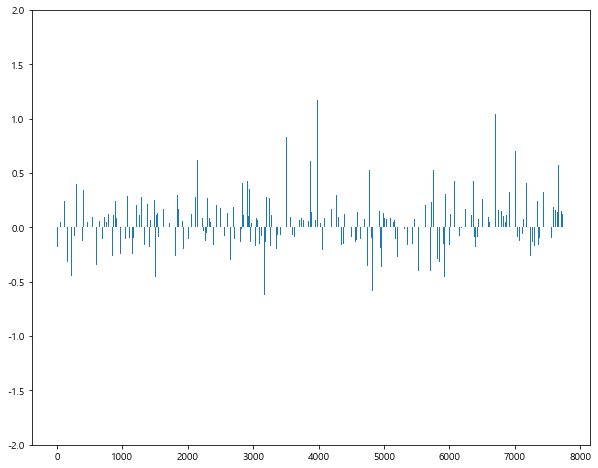

[(1.6302142907327002, 3158), (1.168223869680846, 3983), (1.1681737646247181, 4494), (1.1349517499556192, 3038), (1.081671908108986, 2283)]
[(-1.5258280459291278, 3881), (-1.5376786146362882, 1266), (-1.6094683719984122, 2671), (-2.422747945913317, 799), (-3.5820654210672256, 6208)]
{3881: '시발', 7022: '패스', 1469: '대서', 6637: '칼날', 4940: '위드', 6682: '코로나', 1338: '단계', 5337: '일상', 76..
Positive top 20


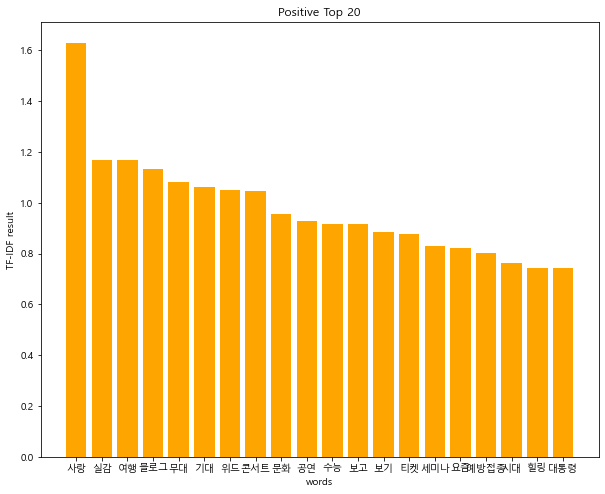

Negative top 20==========


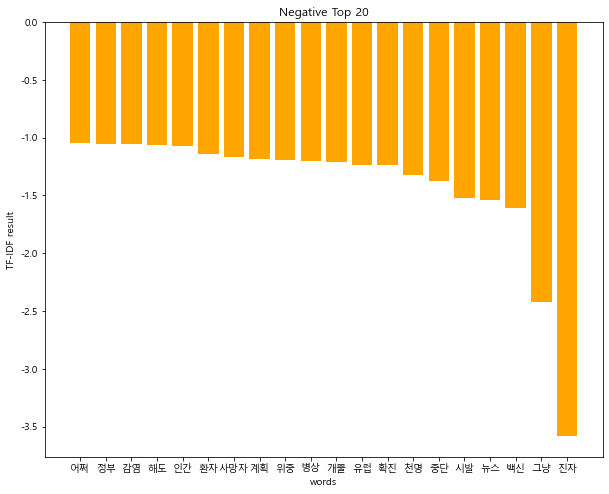

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("./words2.csv", encoding='cp949')

# corpus index 생성
index_vectorizer = CountVectorizer() # 토큰화, 벡터화를 같이 해줌
X = index_vectorizer.fit_transform(df['okt_noun']) # 토큰화 이미 해놨으니까 그냥 해놓은거 넣기만 하면 됨
# (5744, 7269) :  7269의 feature를 가진 5744개의 학습 데이터 셋 

print(X.shape)
print(X[1])
print('===================================================')

# TF-IDF
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)
print('tf-idf result')
print(X.shape)
print(X[1])

#X: tf-idf 처리 한 단어 결과, 데이터, 레이블 전부 포함, test는 30%만 사용
#test용 데이터셋 분리
print("random sampling X- train_test label")
y=df['y']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=15)
print(x_train.shape)
print(x_test.shape)

# 모델 학습
lr = LogisticRegression(random_state=15)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

#성능 평가
print("random sampling X - learning result")
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test, y_pred))
print("Recall: %.3f" % recall_score(y_test, y_pred))
print("F1: %.3f" % f1_score(y_test, y_pred))


#Confusion Matrix 출력
print("random sampling X - Confusion_matrix")
confmat= confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

#y가 0과 1을 얼마나 가지고 있는지 출력(클래스 불균형 문제 해결을 위함)
print("random sampling X - number of y on 0, 1")
print(df['y'].value_counts())



print('===================================================')
#1:1 비율로 랜덤 샘플링 수행
# y가 1,2인 샘플 중 50개를 임의로 추출해서 비율을 맞춰줌
positive_random_idx = df[df['y']==1].sample(1000,random_state=0).index.tolist()
negative_random_idx = df[df['y']==0].sample(1000,random_state=0).index.tolist()

#랜덤 데이터로 데이터셋을 나눔
# test는 30%, train 70%
print("random sampling O - train_test label")
random_idx = positive_random_idx+negative_random_idx
sample_X=X[random_idx,:]
y= df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(sample_X, y, test_size = 0.30, random_state=15)
print(x_train.shape)
print(x_test.shape)

#데이터를 다시 정제한 후 모델 학습 재진행
lr = LogisticRegression(random_state=15)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

#성능 평가
print("random sampling O - learning result")
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test, y_pred))
print("Recall: %.3f" % recall_score(y_test, y_pred))
print("F1: %.3f" % f1_score(y_test, y_pred))

#Confusion Matrix 출력
print("random sampling O - Confusion_matrix")
confmat= confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

#학습한 모델의 계수를 출력하여 피처 영향력을 확인
# 양수인 것들은 트윗에서 긍정적이라고 판단되는 단어, 음수는 트윗에서 부정적이라고 판단되는 단어라고 판단함.
plt.rcParams['figure.figsize']=[10,8]
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])
plt.ylim([-2, 2]) 
plt.show()
print(sorted(((value,index) for index, value in enumerate(lr.coef_[0])), reverse=True)[:5])
print(sorted(((value,index) for index, value in enumerate(lr.coef_[0])), reverse=True)[-5:])

#회귀 모델의 계수를 높은 순으로 정렬
# 긍정 단어와 부정 단어를 출력하기 위해 계수를 기준으로 단어를 정렬하고, 정렬된 벡터를 index_vectorizer 객체에 다시 결과 맵핑
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])),reverse=True)

#회귀 모델의 계수를 index_vec에 맵핑하여 어떤 형태소인지 출력할 수 있게 함
invert_index_vectorizer = {v: k for k, v in index_vectorizer.vocabulary_.items()}

#계수가 높은 순으로 피처에 형태소를 맵핑한 결과를 출력
print(str(invert_index_vectorizer)[:100]+'..')

#계수가 높은 feature는 립에 긍정적인 영향을 주는 형태소
print("Positive top 20")
i=0
positive_x=[]
positive_y=[]
for coef in coef_pos_index[:20]:
    positive_x.append(invert_index_vectorizer[coef[1]])
    positive_y.append(coef[0])
    i+=1
print("================================================================")
plt.clf()
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
plt.bar(positive_x,positive_y, color="orange")
plt.title('Positive Top 20')
plt.xlabel('words')
plt.ylabel('TF-IDF result')
plt.show()

#계수가 낮은 feature는 립에 부정적인 영향을 주는 형태소
print("Negative top 20==========")
i=0
negative_x=[]
negative_y=[]
for coef in coef_pos_index[-20:]:
    negative_x.append(invert_index_vectorizer[coef[1]])
    negative_y.append(coef[0])
    i+=1

plt.clf()
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
plt.bar(negative_x,negative_y, color="orange")
plt.title('Negative Top 20')
plt.xlabel('words')
plt.ylabel('TF-IDF result')
plt.show()

(5744, 7755)
  (0, 4940)	1
  (0, 6682)	1
  (0, 1338)	1
  (0, 5337)	1
  (0, 7667)	1
  (0, 1578)	1
  (0, 5700)	1
  (0, 2167)	1
  (0, 2159)	1
  (0, 3562)	1
  (0, 2671)	3
  (0, 5748)	1
  (0, 6591)	1
  (0, 729)	2
  (0, 4737)	2
  (0, 3561)	2
  (0, 121)	3
  (0, 390)	1
  (0, 6080)	1
  (0, 6661)	1
  (0, 7425)	1
tf-idf result
(5744, 7755)
  (0, 7667)	0.06850812955585264
  (0, 7425)	0.19083611454640934
  (0, 6682)	0.035731935054092
  (0, 6661)	0.22007188093800897
  (0, 6591)	0.22007188093800897
  (0, 6080)	0.19568797220134507
  (0, 5748)	0.13905244607334483
  (0, 5700)	0.21413368708626973
  (0, 5337)	0.0678673890137376
  (0, 4940)	0.039279818421729985
  (0, 4737)	0.27326309366457835
  (0, 3562)	0.23851759582293372
  (0, 3561)	0.47703519164586744
  (0, 2671)	0.1932369973563752
  (0, 2167)	0.23851759582293372
  (0, 2159)	0.1713040634646811
  (0, 1578)	0.1931516214065813
  (0, 1338)	0.06837429084260754
  (0, 729)	0.25867986421060846
  (0, 390)	0.13522320015552172
  (0, 121)	0.3758075461656954
random

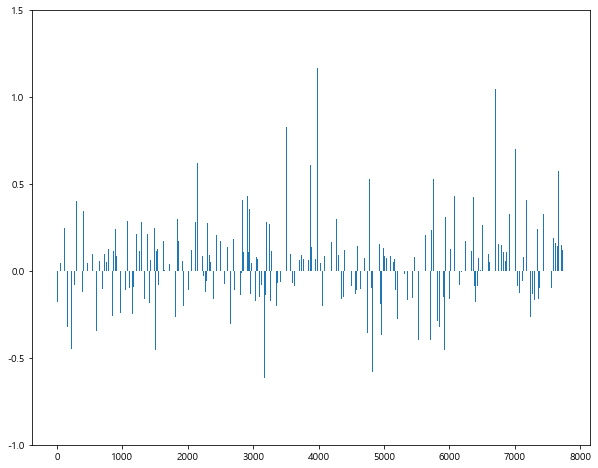

[(1.6302142907327002, 3158), (1.168223869680846, 3983), (1.1681737646247181, 4494), (1.1349517499556192, 3038), (1.081671908108986, 2283)]
[(-1.5258280459291278, 3881), (-1.5376786146362882, 1266), (-1.6094683719984122, 2671), (-2.422747945913317, 799), (-3.5820654210672256, 6208)]
{3881: '시발', 7022: '패스', 1469: '대서', 6637: '칼날', 4940: '위드', 6682: '코로나', 1338: '단계', 5337: '일상', 76..
Positive top 20


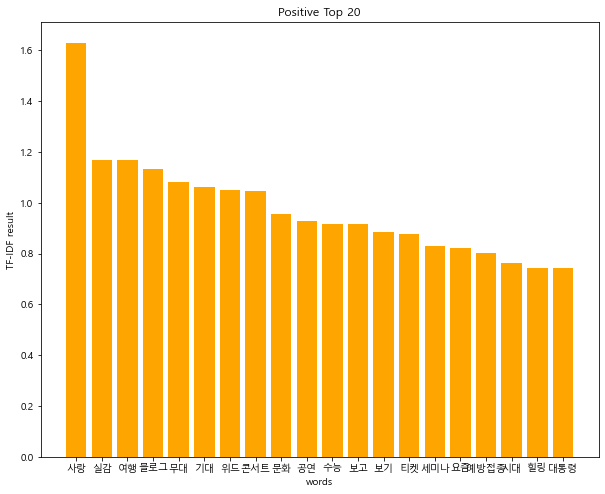

Negative top 20==========


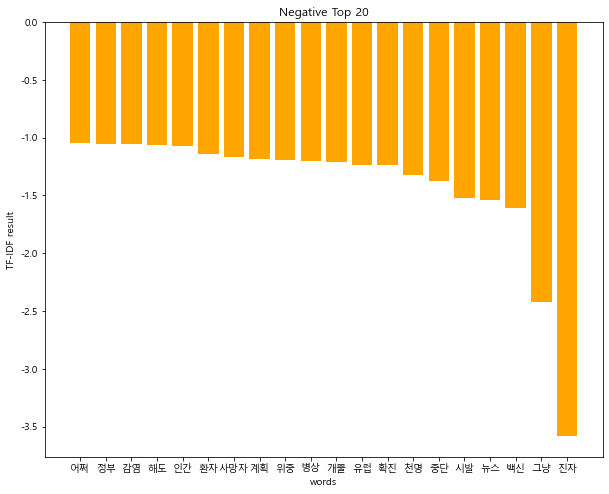

In [3]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import confusion_matrix
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
import matplotlib.pyplot as plt
import pandas as pd


df = pd.read_csv("./words2.csv", encoding='cp949')

# corpus index 생성
index_vectorizer = CountVectorizer() # 토큰화, 벡터화를 같이 해줌
X = index_vectorizer.fit_transform(df['okt_noun']) # 토큰화 이미 해놨으니까 그냥 해놓은거 넣기만 하면 됨
# (5744, 7269) :  7269의 feature를 가진 5744개의 학습 데이터 셋 

print(X.shape)
print(X[1])
print('===================================================')

# TF-IDF
tfidf_vectorizer = TfidfTransformer()
X = tfidf_vectorizer.fit_transform(X)
print('tf-idf result')
print(X.shape)
print(X[1])

#X: tf-idf 처리 한 단어 결과, 데이터, 레이블 전부 포함, test는 30%만 사용
#test용 데이터셋 분리
print("random sampling X- train_test label")
y=df['y']
x_train, x_test, y_train, y_test = train_test_split(X,y,test_size=0.30, random_state=15)
print(x_train.shape)
print(x_test.shape)

# 모델 학습
lr = LogisticRegression(random_state=15)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

#성능 평가
print("random sampling X - learning result")
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test, y_pred))
print("Recall: %.3f" % recall_score(y_test, y_pred))
print("F1: %.3f" % f1_score(y_test, y_pred))


#Confusion Matrix 출력
print("random sampling X - Confusion_matrix")
confmat= confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

#y가 0과 1을 얼마나 가지고 있는지 출력(클래스 불균형 문제 해결을 위함)
print("random sampling X - number of y on 0, 1")
print(df['y'].value_counts())



print('===================================================')
#1:1 비율로 랜덤 샘플링 수행
# y가 1,2인 샘플 중 50개를 임의로 추출해서 비율을 맞춰줌
positive_random_idx = df[df['y']==1].sample(1000,random_state=0).index.tolist()
negative_random_idx = df[df['y']==0].sample(1000,random_state=0).index.tolist()

#랜덤 데이터로 데이터셋을 나눔
# test는 30%, train 70%
print("random sampling O - train_test label")
random_idx = positive_random_idx+negative_random_idx
sample_X=X[random_idx,:]
y= df['y'][random_idx]
x_train, x_test, y_train, y_test = train_test_split(sample_X, y, test_size = 0.30, random_state=15)
print(x_train.shape)
print(x_test.shape)

#데이터를 다시 정제한 후 모델 학습 재진행
lr = LogisticRegression(random_state=15)
lr.fit(x_train, y_train)
y_pred = lr.predict(x_test)
y_pred_probability = lr.predict_proba(x_test)[:,1]

#성능 평가
print("random sampling O - learning result")
print("accuracy: %.2f" % accuracy_score(y_test, y_pred))
print("Precision: %.3f" % precision_score(y_test, y_pred))
print("Recall: %.3f" % recall_score(y_test, y_pred))
print("F1: %.3f" % f1_score(y_test, y_pred))

#Confusion Matrix 출력
print("random sampling O - Confusion_matrix")
confmat= confusion_matrix(y_true=y_test, y_pred=y_pred)
print(confmat)

#학습한 모델의 계수를 출력하여 피처 영향력을 확인
# 양수인 것들은 트윗에서 긍정적이라고 판단되는 단어, 음수는 트윗에서 부정적이라고 판단되는 단어라고 판단함.
plt.rcParams['figure.figsize']=[10,8]
plt.bar(range(len(lr.coef_[0])), lr.coef_[0])
plt.ylim([-1, 1.5]) 
plt.show()
print(sorted(((value,index) for index, value in enumerate(lr.coef_[0])), reverse=True)[:5])
print(sorted(((value,index) for index, value in enumerate(lr.coef_[0])), reverse=True)[-5:])

#회귀 모델의 계수를 높은 순으로 정렬
# 긍정 단어와 부정 단어를 출력하기 위해 계수를 기준으로 단어를 정렬하고, 정렬된 벡터를 index_vectorizer 객체에 다시 결과 맵핑
coef_pos_index = sorted(((value, index) for index, value in enumerate(lr.coef_[0])),reverse=True)

#회귀 모델의 계수를 index_vec에 맵핑하여 어떤 형태소인지 출력할 수 있게 함
invert_index_vectorizer = {v: k for k, v in index_vectorizer.vocabulary_.items()}

#계수가 높은 순으로 피처에 형태소를 맵핑한 결과를 출력
print(str(invert_index_vectorizer)[:100]+'..')

#계수가 높은 feature는 립에 긍정적인 영향을 주는 형태소
print("Positive top 20")
i=0
positive_x=[]
positive_y=[]
for coef in coef_pos_index[:20]:
    positive_x.append(invert_index_vectorizer[coef[1]])
    positive_y.append(coef[0])
    i+=1
print("================================================================")
plt.clf()
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
plt.bar(positive_x,positive_y, color="orange")
plt.title('Positive Top 20')
plt.xlabel('words')
plt.ylabel('TF-IDF result')
plt.show()

#계수가 낮은 feature는 립에 부정적인 영향을 주는 형태소
print("Negative top 20==========")
i=0
negative_x=[]
negative_y=[]
for coef in coef_pos_index[-20:]:
    negative_x.append(invert_index_vectorizer[coef[1]])
    negative_y.append(coef[0])
    i+=1

plt.clf()
plt.rcParams['font.family'] ='Malgun Gothic'
plt.rcParams['axes.unicode_minus'] =False
plt.bar(negative_x,negative_y, color="orange")
plt.title('Negative Top 20')
plt.xlabel('words')
plt.ylabel('TF-IDF result')
plt.show()